# 분석시나리오 2

## <font color=blue>확진자 수 VS 업종별(대분류)개인 신용매출액 상관분석</font>

In [1]:
## 모기 데이터 사용하기

In [1]:
# 소비데이터불러오기

# 선언
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [3]:
card = 'data\p_card4.xlsx'

In [5]:
card_df = pd.read_excel(card, sheet_name = '원자료')
card_df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,44936072,38921767,44496876,43591233,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,1449551,1390063,1435383,1453041,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,6717820,6046211,6697911,6616299,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,216704,215936,216062,220543,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,1259884,1145085,1351477,1279599,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777


In [11]:
# 필요없는 컬럼 삭제

del card_df['통계표']
del card_df['변환'] 
# 단위는 백만원이다.
del card_df['단위'] 
card_df

#두칸 공백이 있으면 소분류이다.

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,298,306,435,326,421,341,254,289,402,301
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11433,11404,12081,10616,11013,10427,9347,10863,9708,9109
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,369,380,390,342,367,336,312,350,313,325
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11466,11373,13168,10204,11005,9802,10007,9944,11564,8890


In [12]:
# 소분류, 대분류 붙이기

merc = list()

for x in range(len(card_df)):
    if len(card_df['소비유형코드'][x].split(' '))==1:
        merc.append('대분류')
    else: 
        merc.append('소분류')
        
merc

['대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',


In [13]:
len(merc)

1476

In [14]:
# 원래 DataFrame에 붙이기
card_df['대소분류구분'] = merc
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,229936,225889,235818,249490,238870,250262,235457,246281,223755,대분류
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,306,435,326,421,341,254,289,402,301,소분류
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11404,12081,10616,11013,10427,9347,10863,9708,9109,대분류
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,380,390,342,367,336,312,350,313,325,대분류
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11373,13168,10204,11005,9802,10007,9944,11564,8890,대분류


In [9]:
# 모기 데이터 끝

In [10]:
# 전국, 대분류, 총액 데이터 가져오기

In [15]:
card_df_sum = card_df[(card_df.지역코드=='전국') & (card_df.금액구분코드=='총액')&(card_df.대소분류구분=='대분류')]
card_df_sum

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,11332876,11921832,11762070,11733727,12498677,12988975,13200630,13162164,11902937,대분류
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,843926,852405,921161,1265704,977925,975218,1001439,1285590,798669,대분류
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1031048,952645,847157,1008459,1210118,1139854,1082268,977024,793406,대분류
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2607119,2801180,2728556,2627140,2928012,3007486,3004262,2946530,2632130,대분류
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1328889,1517272,1383383,1184915,1306848,1301222,1152933,1283768,1187513,대분류
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,3825910,3941412,3741396,3549924,4033402,3879853,4095031,4183821,3652065,대분류
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,3055501,3010513,2546455,2322181,2757606,2862530,2996016,2326235,2321611,대분류
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,660371,577479,545371,584841,697987,771992,620872,642424,539946,대분류


In [16]:
card_df_sum.set_index('소비유형코드', inplace=True)
card_df_sum

,지역코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
소비유형코드,,,,,,,,,,,,,,,,,,,,,
합계,전국,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,45275053,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
종합소매,전국,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,6896010,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
전자상거래/통신판매,전국,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,7560020,...,11332876,11921832,11762070,11733727,12498677,12988975,13200630,13162164,11902937,대분류
식료품,전국,총액,838711,778584,703205,697603,760900,709244,679288,751927,...,843926,852405,921161,1265704,977925,975218,1001439,1285590,798669,대분류
의류/잡화,전국,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,1020957,...,1031048,952645,847157,1008459,1210118,1139854,1082268,977024,793406,대분류
연료,전국,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,2748775,...,2607119,2801180,2728556,2627140,2928012,3007486,3004262,2946530,2632130,대분류
가구/가전,전국,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,1284287,...,1328889,1517272,1383383,1184915,1306848,1301222,1152933,1283768,1187513,대분류
의료/보건,전국,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,3550365,...,3825910,3941412,3741396,3549924,4033402,3879853,4095031,4183821,3652065,대분류
자동차,전국,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,2283828,...,3055501,3010513,2546455,2322181,2757606,2862530,2996016,2326235,2321611,대분류


In [17]:
card_df_sum=card_df_sum.transpose()
card_df_sum

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
지역코드,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국
금액구분코드,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액
2019/01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061
2019/02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970
2019/03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031
2019/04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985
2019/05,46109266,7113120,7817066,760900,1317136,2716282,1428125,3528229,2478845,1188161,1497833,1134549,5486806,1828686,3440014
2019/06,43594544,6691472,7285161,709244,1178323,2583850,1230078,3373985,2256471,1120378,1405616,1098704,5249972,1766931,3244392
2019/07,46211620,6898126,7836989,679288,1108101,2566747,1313486,3492110,2321229,1244302,1386808,1160300,5429889,1902882,3316420
2019/08,45275053,6896010,7560020,751927,1020957,2748775,1284287,3550365,2283828,1141198,1367256,1260614,5723903,1842559,3393342


In [18]:
card_df_sum = card_df_sum.drop(card_df_sum.index[-1])
card_df_sum

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
지역코드,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국
금액구분코드,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액
2019/01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061
2019/02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970
2019/03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031
2019/04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985
2019/05,46109266,7113120,7817066,760900,1317136,2716282,1428125,3528229,2478845,1188161,1497833,1134549,5486806,1828686,3440014
2019/06,43594544,6691472,7285161,709244,1178323,2583850,1230078,3373985,2256471,1120378,1405616,1098704,5249972,1766931,3244392
2019/07,46211620,6898126,7836989,679288,1108101,2566747,1313486,3492110,2321229,1244302,1386808,1160300,5429889,1902882,3316420
2019/08,45275053,6896010,7560020,751927,1020957,2748775,1284287,3550365,2283828,1141198,1367256,1260614,5723903,1842559,3393342


In [19]:
card_df_sum = card_df_sum.drop(card_df_sum.index[0])
card_df_sum.head()

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
금액구분코드,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액,총액
2019/01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061
2019/02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970
2019/03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031
2019/04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985


In [20]:
card_df_sum = card_df_sum.drop(card_df_sum.index[0])
card_df_sum.head()

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
2019/01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061
2019/02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970
2019/03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031
2019/04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985
2019/05,46109266,7113120,7817066,760900,1317136,2716282,1428125,3528229,2478845,1188161,1497833,1134549,5486806,1828686,3440014


In [21]:
card_df_sum['base_ym'] = ''
card_df_sum.head()

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타,base_ym
2019/01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061,
2019/02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970,
2019/03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031,
2019/04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985,
2019/05,46109266,7113120,7817066,760900,1317136,2716282,1428125,3528229,2478845,1188161,1497833,1134549,5486806,1828686,3440014,


In [22]:
for i in range(len(card_df_sum)):
    card_df_sum['base_ym'][i] = card_df_sum.index[i][2:4]+'.'+card_df_sum.index[i][5:7]

In [23]:
card_df_sum.set_index('base_ym', inplace=True)
card_df_sum

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
base_ym,,,,,,,,,,,,,,,
19.01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061
19.02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970
19.03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031
19.04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985
19.05,46109266,7113120,7817066,760900,1317136,2716282,1428125,3528229,2478845,1188161,1497833,1134549,5486806,1828686,3440014
19.06,43594544,6691472,7285161,709244,1178323,2583850,1230078,3373985,2256471,1120378,1405616,1098704,5249972,1766931,3244392
19.07,46211620,6898126,7836989,679288,1108101,2566747,1313486,3492110,2321229,1244302,1386808,1160300,5429889,1902882,3316420
19.08,45275053,6896010,7560020,751927,1020957,2748775,1284287,3550365,2283828,1141198,1367256,1260614,5723903,1842559,3393342
19.09,43921467,7194243,7618476,952101,1075188,2505495,1129700,3155649,2125179,1016303,1299761,1065444,4893228,1794868,3293583


In [24]:
# 오름차순 정렬 후 2020.1월부터 가져오기
card_df_sum = card_df_sum.sort_index(ascending=True)
card_df_sum

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
base_ym,,,,,,,,,,,,,,,
19.01,44936072,6717820,7595436,838711,1132901,2507052,1262882,3633792,2195702,1247162,1190510,1138526,5139064,1733680,3286061
19.02,38921767,6046211,6670919,778584,1001630,2216700,1163903,3066496,1956543,1047980,1101948,1074595,4475650,1605506,2930970
19.03,44496876,6697911,7741855,703205,1241781,2524854,1430280,3487020,2575204,1110523,1450682,1200939,5163005,1829659,3285031
19.04,43591233,6616299,7495993,697603,1201059,2504898,1268250,3368808,2463015,1168304,1369465,991952,5028386,1775080,3202985
19.05,46109266,7113120,7817066,760900,1317136,2716282,1428125,3528229,2478845,1188161,1497833,1134549,5486806,1828686,3440014
19.06,43594544,6691472,7285161,709244,1178323,2583850,1230078,3373985,2256471,1120378,1405616,1098704,5249972,1766931,3244392
19.07,46211620,6898126,7836989,679288,1108101,2566747,1313486,3492110,2321229,1244302,1386808,1160300,5429889,1902882,3316420
19.08,45275053,6896010,7560020,751927,1020957,2748775,1284287,3550365,2283828,1141198,1367256,1260614,5723903,1842559,3393342
19.09,43921467,7194243,7618476,952101,1075188,2505495,1129700,3155649,2125179,1016303,1299761,1065444,4893228,1794868,3293583


In [25]:
card_df_sum = card_df_sum['20.03':]
card_df_sum.head()

소비유형코드,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타
base_ym,,,,,,,,,,,,,,,
20.03,41916271,6199441,9356647,772236,790272,2333011,1269307,3104928,2810192,254144,968773,639454,3787335,2114417,3165398
20.04,43066211,6171505,8953650,787775,914246,2117983,1261647,3341103,3081897,387608,1139445,785312,4193461,2039624,3284241
20.05,46919475,6906442,9362555,914105,1241568,2051030,1545067,3521711,3293540,504882,1465958,966100,5188829,2067863,3440454
20.06,46392367,6682711,9511582,743881,1080762,2105299,1553145,3489329,3559317,545298,1318306,924970,4763538,2108495,3396206
20.07,47806147,6425118,9590306,762720,955978,2193748,1354435,3670380,3069080,617638,1266685,1018355,5004338,2179082,3559879


In [26]:
# 월별 코로나 신규 확진자 수 가져오기
df_covid_data = pd.read_excel('data/data_covid.xlsx')
df_covid_data.head()

,base_mm,covid_new
0,2020/01,0
1,2020/02,0
2,2020/03,0
3,2020/04,979
4,2020/05,703


In [27]:
df_covid_data['base_ym'] = ''
df_covid_data.head()

,base_mm,covid_new,base_ym
0,2020/01,0,
1,2020/02,0,
2,2020/03,0,
3,2020/04,979,
4,2020/05,703,


In [28]:
for i in range(len(df_covid_data)):
    df_covid_data['base_ym'][i] = df_covid_data.base_mm[i][2:4]+'.'+df_covid_data.base_mm[i][5:7]

C:\Users\student\AppData\Local\Temp\ipykernel_7368\1769874569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_data['base_ym'][i] = df_covid_data.base_mm[i][2:4]+'.'+df_covid_data.base_mm[i][5:7]


In [29]:
df_covid_data.set_index('base_ym', inplace=True)
df_covid_data

,base_mm,covid_new
base_ym,,
20.01,2020/01,0
20.02,2020/02,0
20.03,2020/03,0
20.04,2020/04,979
20.05,2020/05,703
20.06,2020/06,1334
20.07,2020/07,1506
20.08,2020/08,5642
20.09,2020/09,3865


In [30]:
type(df_covid_data.index[1])

str

In [31]:
# 월별데이터 기준시점별 조인
df_corr_data = pd.merge(card_df_sum, df_covid_data, on = 'base_ym')
df_corr_data

,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타,base_mm,covid_new
base_ym,,,,,,,,,,,,,,,,,
20.03,41916271,6199441,9356647,772236,790272,2333011,1269307,3104928,2810192,254144,968773,639454,3787335,2114417,3165398,2020/03,0
20.04,43066211,6171505,8953650,787775,914246,2117983,1261647,3341103,3081897,387608,1139445,785312,4193461,2039624,3284241,2020/04,979
20.05,46919475,6906442,9362555,914105,1241568,2051030,1545067,3521711,3293540,504882,1465958,966100,5188829,2067863,3440454,2020/05,703
20.06,46392367,6682711,9511582,743881,1080762,2105299,1553145,3489329,3559317,545298,1318306,924970,4763538,2108495,3396206,2020/06,1334
20.07,47806147,6425118,9590306,762720,955978,2193748,1354435,3670380,3069080,617638,1266685,1018355,5004338,2179082,3559879,2020/07,1506
20.08,46377231,6907219,9726021,816118,831741,2235001,1571385,3437263,2504589,544716,1179052,1062128,5050357,2061184,3373144,2020/08,5642
20.09,47128339,7131539,10294257,1093482,884961,2161210,1302834,3567469,3129265,465439,1075173,873666,3962030,2092242,3553331,2020/09,3865
20.10,47304200,6917751,10038920,878412,1078209,2183887,1229810,3362489,2958212,567377,1392373,938880,4669870,2127185,3483608,2020/10,2714
20.11,47680752,7008770,10657390,861371,1033801,2201357,1367591,3430968,3125446,592846,1281384,956707,4523926,2104931,3489589,2020/11,7768


In [32]:
# base_mm 삭제
df_corr_data.drop(['base_mm'], axis=1, inplace=True)

In [33]:
df_corr_data.head()

,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타,covid_new
base_ym,,,,,,,,,,,,,,,,
20.03,41916271,6199441,9356647,772236,790272,2333011,1269307,3104928,2810192,254144,968773,639454,3787335,2114417,3165398,0
20.04,43066211,6171505,8953650,787775,914246,2117983,1261647,3341103,3081897,387608,1139445,785312,4193461,2039624,3284241,979
20.05,46919475,6906442,9362555,914105,1241568,2051030,1545067,3521711,3293540,504882,1465958,966100,5188829,2067863,3440454,703
20.06,46392367,6682711,9511582,743881,1080762,2105299,1553145,3489329,3559317,545298,1318306,924970,4763538,2108495,3396206,1334
20.07,47806147,6425118,9590306,762720,955978,2193748,1354435,3670380,3069080,617638,1266685,1018355,5004338,2179082,3559879,1506


In [34]:
# df_corr_data = df_corr_data['20.01':]
df_corr_data = df_corr_data['20.03':'21.12']
df_corr_data

,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타,covid_new
base_ym,,,,,,,,,,,,,,,,
20.03,41916271,6199441,9356647,772236,790272,2333011,1269307,3104928,2810192,254144,968773,639454,3787335,2114417,3165398,0
20.04,43066211,6171505,8953650,787775,914246,2117983,1261647,3341103,3081897,387608,1139445,785312,4193461,2039624,3284241,979
20.05,46919475,6906442,9362555,914105,1241568,2051030,1545067,3521711,3293540,504882,1465958,966100,5188829,2067863,3440454,703
20.06,46392367,6682711,9511582,743881,1080762,2105299,1553145,3489329,3559317,545298,1318306,924970,4763538,2108495,3396206,1334
20.07,47806147,6425118,9590306,762720,955978,2193748,1354435,3670380,3069080,617638,1266685,1018355,5004338,2179082,3559879,1506
20.08,46377231,6907219,9726021,816118,831741,2235001,1571385,3437263,2504589,544716,1179052,1062128,5050357,2061184,3373144,5642
20.09,47128339,7131539,10294257,1093482,884961,2161210,1302834,3567469,3129265,465439,1075173,873666,3962030,2092242,3553331,3865
20.10,47304200,6917751,10038920,878412,1078209,2183887,1229810,3362489,2958212,567377,1392373,938880,4669870,2127185,3483608,2714
20.11,47680752,7008770,10657390,861371,1033801,2201357,1367591,3430968,3125446,592846,1281384,956707,4523926,2104931,3489589,7768


In [35]:
# float 형 아니면 그래프 그릴때 error 남....
df_corr_data = df_corr_data.astype(float)
df_corr_data

,합계,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,금융/보험,기타,covid_new
base_ym,,,,,,,,,,,,,,,,
20.03,41916271.0,6199441.0,9356647.0,772236.0,790272.0,2333011.0,1269307.0,3104928.0,2810192.0,254144.0,968773.0,639454.0,3787335.0,2114417.0,3165398.0,0.0
20.04,43066211.0,6171505.0,8953650.0,787775.0,914246.0,2117983.0,1261647.0,3341103.0,3081897.0,387608.0,1139445.0,785312.0,4193461.0,2039624.0,3284241.0,979.0
20.05,46919475.0,6906442.0,9362555.0,914105.0,1241568.0,2051030.0,1545067.0,3521711.0,3293540.0,504882.0,1465958.0,966100.0,5188829.0,2067863.0,3440454.0,703.0
20.06,46392367.0,6682711.0,9511582.0,743881.0,1080762.0,2105299.0,1553145.0,3489329.0,3559317.0,545298.0,1318306.0,924970.0,4763538.0,2108495.0,3396206.0,1334.0
20.07,47806147.0,6425118.0,9590306.0,762720.0,955978.0,2193748.0,1354435.0,3670380.0,3069080.0,617638.0,1266685.0,1018355.0,5004338.0,2179082.0,3559879.0,1506.0
20.08,46377231.0,6907219.0,9726021.0,816118.0,831741.0,2235001.0,1571385.0,3437263.0,2504589.0,544716.0,1179052.0,1062128.0,5050357.0,2061184.0,3373144.0,5642.0
20.09,47128339.0,7131539.0,10294257.0,1093482.0,884961.0,2161210.0,1302834.0,3567469.0,3129265.0,465439.0,1075173.0,873666.0,3962030.0,2092242.0,3553331.0,3865.0
20.10,47304200.0,6917751.0,10038920.0,878412.0,1078209.0,2183887.0,1229810.0,3362489.0,2958212.0,567377.0,1392373.0,938880.0,4669870.0,2127185.0,3483608.0,2714.0
20.11,47680752.0,7008770.0,10657390.0,861371.0,1033801.0,2201357.0,1367591.0,3430968.0,3125446.0,592846.0,1281384.0,956707.0,4523926.0,2104931.0,3489589.0,7768.0


In [36]:
import seaborn as sns

In [37]:
# implot 시도 했으나 subplot적용안됨

def draw_regplot(param):
    sns.set_color_codes("pastel")
    # sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 적용
    
    if param == df_corr_data.columns[0]:
        sns.regplot(x= df_corr_data.columns[0], y="covid_new", data=df_corr_data)

    elif param == df_corr_data.columns[1]:
        sns.regplot(x= df_corr_data.columns[1], y="covid_new", data=df_corr_data)

    elif param == df_corr_data.columns[2]:
        sns.regplot(x= df_corr_data.columns[2], y="covid_new", data=df_corr_data)

    elif param == df_corr_data.columns[3]:
        sns.regplot(x= df_corr_data.columns[3], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[4]:
        sns.regplot(x= df_corr_data.columns[4], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[5]:
        sns.regplot(x= df_corr_data.columns[5], y="covid_new", data=df_corr_data)

    elif param == df_corr_data.columns[6]:
        sns.regplot(x= df_corr_data.columns[6], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[7]:
        sns.regplot(x= df_corr_data.columns[7], y="covid_new", data=df_corr_data)               
        
    elif param == df_corr_data.columns[8]:
        sns.regplot(x= df_corr_data.columns[8], y="covid_new", data=df_corr_data)

    elif param == df_corr_data.columns[9]:
        sns.regplot(x= df_corr_data.columns[9], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[10]:
        sns.regplot(x= df_corr_data.columns[10], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[11]:
        sns.regplot(x= df_corr_data.columns[11], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[12]:
        sns.regplot(x= df_corr_data.columns[12], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[13]:
        sns.regplot(x= df_corr_data.columns[13], y="covid_new", data=df_corr_data)        
        
    elif param == df_corr_data.columns[14]:
        sns.regplot(x= df_corr_data.columns[14], y="covid_new", data=df_corr_data)        

C:\Python\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


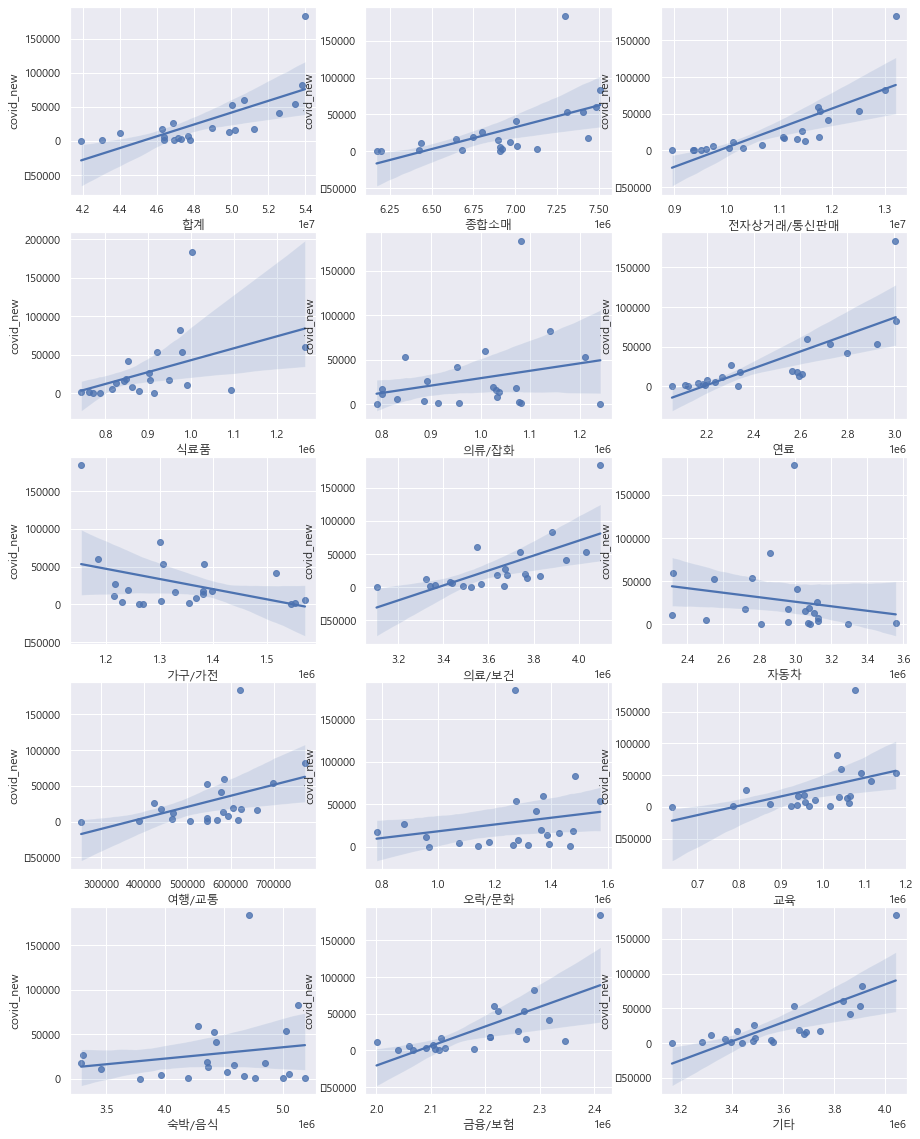

In [38]:
#r 기간을 20.3월 ~ 21.12월까지
#r 기간을 20.1월 ~ 22.2월까지 했을때 최근에 신규 확진자 수가 급 증가해서 수치에 영향을 많이 줌

plt.figure(figsize=(15,20))
# figure 전체 제목
# plt.suptitle('업종별 상관관계 분석', fontsize = 25)
k=0
for i in range(5):
    for j in range(3):
        plt.subplot2grid((5,3), (i,j))     
        draw_regplot(df_corr_data.columns[k])
        k = k + 1

plt.show()